In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVC

In [42]:
df = pd.read_csv("data/rain_outliers_removed.csv")

# encoding RainTomorrow and RainToday as binary values
df.RainToday.replace(("Yes", "No"), (1,0), inplace = True)
df.RainTomorrow.replace(("Yes", "No"), (1,0), inplace = True)

categorical_columns = ["Season", "WindGustDir", "WindDir9am", "WindDir3pm"]

df = pd.get_dummies(df, columns = categorical_columns)

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,...,123710.00000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000
mean,12.419597,23.495168,0.199961,5.019636,7.473673,39.990664,14.680834,18.833732,67.856301,50.802320,...,0.05521,0.058645,0.070795,0.072387,0.067933,0.059041,0.066341,0.072589,0.063908,0.067771
std,6.363182,7.143505,0.445323,3.174230,3.903183,11.970577,7.612168,7.914690,18.695856,20.988174,...,0.22839,0.234960,0.256482,0.259129,0.251632,0.235703,0.248878,0.259462,0.244589,0.251354
min,-6.100000,2.400000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,17.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.800000,18.100000,0.000000,2.400000,4.500000,31.000000,9.000000,13.000000,56.000000,36.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.200000,23.000000,0.000000,4.400000,8.300000,39.000000,13.000000,19.000000,69.000000,51.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.100000,28.600000,0.200000,7.000000,10.700000,48.000000,20.000000,24.000000,82.000000,65.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,44.300000,2.000000,14.700000,14.500000,72.000000,35.000000,39.000000,100.000000,100.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
y = df.RainTomorrow.to_numpy()
X = df.drop(columns=['RainTomorrow']).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [48]:
pipe = Pipeline([('scaler', RobustScaler()), ('svc', SVC())])

In [49]:
%%time
pipe.fit(X_train, y_train)

CPU times: user 19min 13s, sys: 190 ms, total: 19min 14s
Wall time: 19min 15s


Pipeline(steps=[('scaler', RobustScaler()), ('svc', SVC())])

In [50]:
pipe.score(X_test, y_test)

0.8505375474900978

In [ ]:
# TODO: add different measures (better than accuracy for this XD)

/home/witold/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


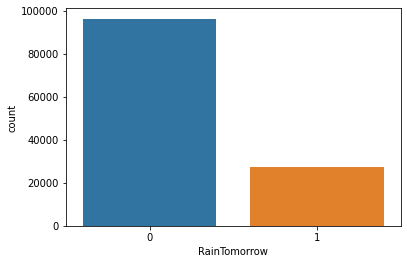

In [5]:
g = sns.countplot(df['RainTomorrow'])
plt.show()

I'm going to try under- and over- sampling here: